In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# 새 섹션

In [0]:
%cd /content/gdrive/My Drive/수퍼판다

/content/gdrive/My Drive/수퍼판다


In [0]:
# geopandas 설치하기

In [0]:
!pip install geopandas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
import geopy
from shapely.geometry import Polygon,Point 
from shapely.wkt import dumps, loads
from pyproj import Proj, transform

import descartes

In [0]:
airdef = pd.read_csv('./미세먼지_행정동코드_붙이기/airdef.csv')
airdef.drop('Unnamed: 0', axis=1, inplace=True)
airdef.head()

,종로구,종_스테이션,종_측정기 등록일,종_위치,노원구,노_스테이션,노_측정기_등록일,노_위치,종_좌표,노_좌표
0,31지점,V10O1610252,2017-12-26 00:00:00,교남동,22지점,V10O1610610,#,하계동,POINT (126.9619706 37.5718391),POINT (127.0725939 37.637576)
1,NaN,V10O1610546,2018-03-09 00:00:00,세종로 100,NaN,V10O1610376,2017-12-27 00:00:00,상계동,POINT (126.9779584 37.5721178),POINT (127.0730618 37.67480279999999)
2,NaN,V10O1610540,2018-03-14 00:00:00,세종로 100,NaN,V10O1610293,2017-12-27 00:00:00,상계동,POINT (126.9779584 37.5721178),POINT (127.0730618 37.67480279999999)
3,NaN,V10O1610542,2018-03-14 00:00:00,세종로 100,NaN,V10O1610356,2017-12-27 00:00:00,상계동,POINT (126.9779584 37.5721178),POINT (127.0730618 37.67480279999999)
4,NaN,V10O1610543,2018-03-09 00:00:00,세종로 100,NaN,V10O1610616,2017-12-23 00:00:00,상계2동,POINT (126.9779584 37.5721178),POINT (127.0684857 37.6587754)


In [0]:
jong_airdef = airdef[['종_스테이션', '종_측정기 등록일', '종_위치', '종_좌표']]
jong_airdef.columns = ['종_스테이션', '종_측정기_등록일', '종_위치', 'geometry']  # 나중에 플롯에 찍어줄 때 좌표값 들어있는 컬럼 이름이 geometry가 아니면,, 인식이 안되길래,,

no_airdef = airdef[['노_스테이션', '노_측정기_등록일', '노_위치', '노_좌표']]
no_airdef.columns = ['노_스테이션', '노_측정기_등록일', '노_위치', 'geometry']
no_airdef.drop(range(22,31), axis=0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
jong_airdef = gpd.GeoDataFrame(jong_airdef)
jong_airdef['geometry'] = jong_airdef['geometry'].apply(loads)
no_airdef = gpd.GeoDataFrame(no_airdef)
no_airdef['geometry'] = no_airdef['geometry'].apply(loads)

In [0]:
shp_data = gpd.read_file('./data/유동인구데이터/행정동경계파일/종로_노원_행정동.shp')
shp_data.head()

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
0,2019,1111051500,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,"POLYGON ((954129.8669746373 1953798.669009524,..."
1,2019,1111053000,사직동,11,서울특별시,11110,종로구,1128161.02,5498.40,126.9709195,37.5734080,"POLYGON ((953819.5813218723 1952337.088336873,..."
2,2019,1111054000,삼청동,11,서울특별시,11110,종로구,1478468.25,7377.76,126.9840280,37.5820830,"POLYGON ((954899.1274955807 1954728.194623269,..."
3,2019,1111055000,부암동,11,서울특별시,11110,종로구,2276588.99,8912.71,126.9665000,37.5899170,"POLYGON ((953850.1888335885 1955599.258110879,..."
4,2019,1111056000,평창동,11,서울특별시,11110,종로구,8951336.18,13312.43,126.9689720,37.6025830,"POLYGON ((954707.9682132024 1956727.982527763,..."


polygon 좌표  
epsg5179 -> WGS84 변환해주는 과정

In [0]:
epsg = Proj(init = 'epsg:5179')
wgs = Proj(init = 'epsg:4326')

def wgs_to_epsg(data):
    return pd.Series(transform(wgs, epsg, data.x,data.y ),\
                     index=['epsg_x', 'epsg_y'])

In [0]:
jong_airdef[['x','y']] = jong_airdef['geometry'].apply(wgs_to_epsg)
jong_airdef.head()

,종_스테이션,종_측정기_등록일,종_위치,geometry,x,y
0,V10O1610252,2017-12-26 00:00:00,교남동,POINT (126.9619706 37.5718391),952488.958797,1.952632e+06
1,V10O1610546,2018-03-09 00:00:00,세종로 100,POINT (126.9779584 37.5721178),953900.954091,1.952655e+06
2,V10O1610540,2018-03-14 00:00:00,세종로 100,POINT (126.9779584 37.5721178),953900.954091,1.952655e+06
3,V10O1610542,2018-03-14 00:00:00,세종로 100,POINT (126.9779584 37.5721178),953900.954091,1.952655e+06
4,V10O1610543,2018-03-09 00:00:00,세종로 100,POINT (126.9779584 37.5721178),953900.954091,1.952655e+06


In [0]:
new_points = []
for i in jong_airdef.values:
    new_points.append(Point(i[4], i[5]))

jong_airdef['geometry'] = new_points

In [0]:
jong_airdef.drop(['x', 'y'],axis=1, inplace=True)
jong_airdef.head()

,종_스테이션,종_측정기_등록일,종_위치,geometry
0,V10O1610252,2017-12-26 00:00:00,교남동,POINT (952488.9587971973 1952632.412570048)
1,V10O1610546,2018-03-09 00:00:00,세종로 100,POINT (953900.95409101 1952655.36899779)
2,V10O1610540,2018-03-14 00:00:00,세종로 100,POINT (953900.95409101 1952655.36899779)
3,V10O1610542,2018-03-14 00:00:00,세종로 100,POINT (953900.95409101 1952655.36899779)
4,V10O1610543,2018-03-09 00:00:00,세종로 100,POINT (953900.95409101 1952655.36899779)


In [0]:
no_airdef[['x','y']] = no_airdef['geometry'].apply(wgs_to_epsg)
no_airdef.head()

,노_스테이션,노_측정기_등록일,노_위치,geometry,x,y
0,V10O1610610,#,하계동,POINT (127.0725939 37.637576),962290.874256,1.959875e+06
1,V10O1610376,2017-12-27 00:00:00,상계동,POINT (127.0730618 37.67480279999999),962350.958307,1.964005e+06
2,V10O1610293,2017-12-27 00:00:00,상계동,POINT (127.0730618 37.67480279999999),962350.958307,1.964005e+06
3,V10O1610356,2017-12-27 00:00:00,상계동,POINT (127.0730618 37.67480279999999),962350.958307,1.964005e+06
4,V10O1610616,2017-12-23 00:00:00,상계2동,POINT (127.0684857 37.6587754),961939.234725,1.962229e+06


In [0]:
new_points = []
for i in no_airdef.values:
    new_points.append(Point(i[4], i[5]))

no_airdef['geometry'] = new_points



In [0]:
no_airdef.drop(['x', 'y'],axis=1, inplace=True)
no_airdef.head()

,노_스테이션,노_측정기_등록일,노_위치,geometry
0,V10O1610610,#,하계동,POINT (962290.8742555019 1959875.434860487)
1,V10O1610376,2017-12-27 00:00:00,상계동,POINT (962350.958307276 1964005.42537919)
2,V10O1610293,2017-12-27 00:00:00,상계동,POINT (962350.958307276 1964005.42537919)
3,V10O1610356,2017-12-27 00:00:00,상계동,POINT (962350.958307276 1964005.42537919)
4,V10O1610616,2017-12-23 00:00:00,상계2동,POINT (961939.2347247372 1962229.08768797)


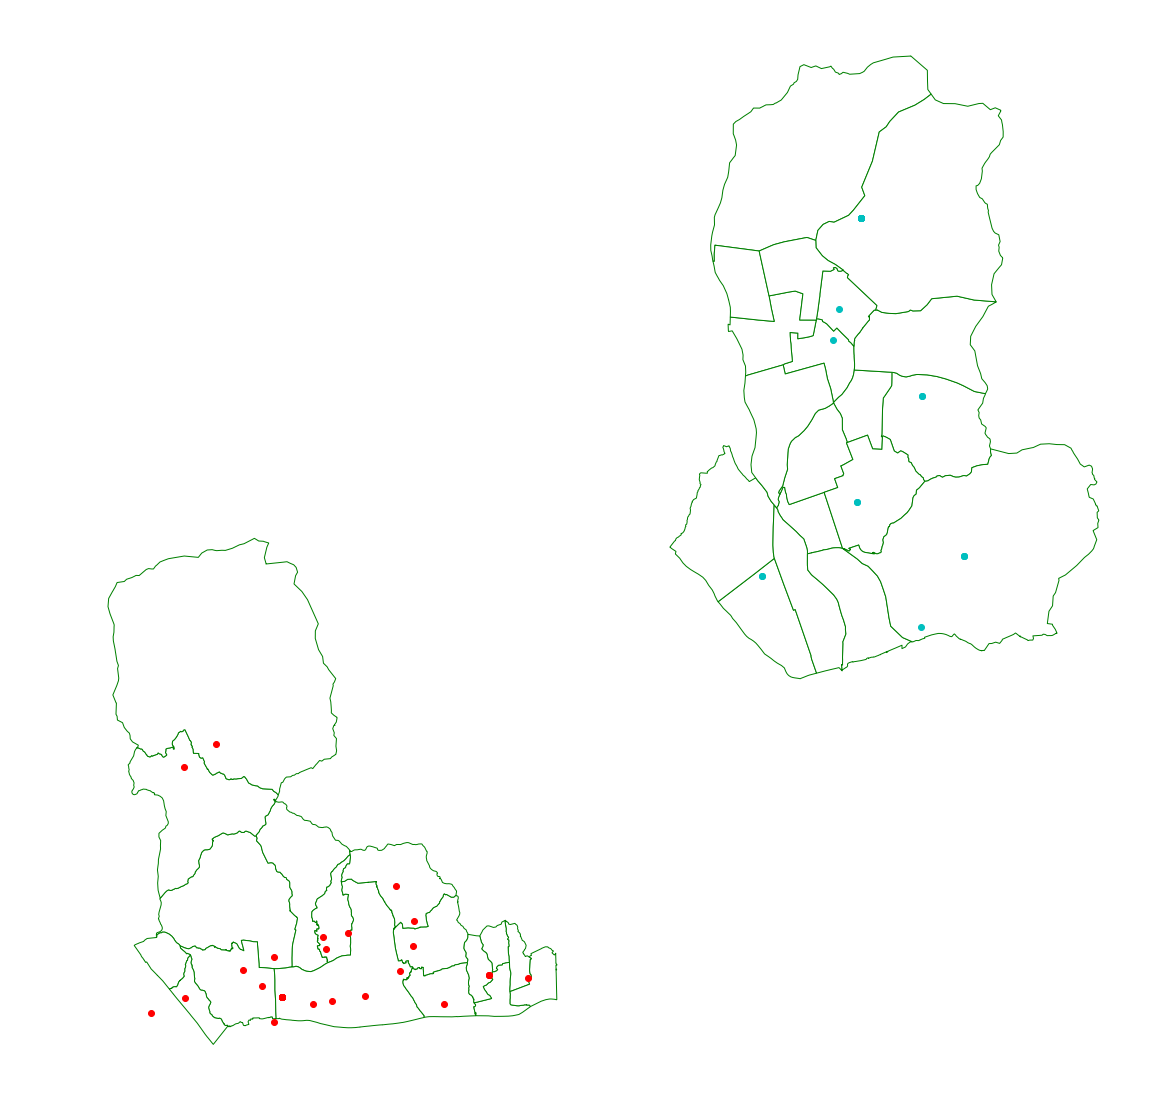

In [0]:
ax = shp_data.plot(figsize = (20, 20),color="w", edgecolor="g")
jong_airdef.plot(ax=ax, color='r')
no_airdef.plot(ax=ax, color='c')
ax.set_axis_off()
plt.show()

In [0]:
trial = []
for i in jong_airdef[['종_스테이션','geometry']].values:
    for j in shp_data[['HDONG_NM','HDONG_CD','geometry']].values:
        if j[2].contains(i[1]):
            trial.append([i[0],j[0], j[1]])
            
jong_temp = pd.DataFrame(trial, columns = ['종_스테이션', 'G_DONG', 'G_CODE'])

jong_temp.head()

jong_airdef = pd.merge(jong_airdef, jong_temp, how='left')

In [0]:
trial = []
for i in no_airdef[['노_스테이션','geometry']].values:
    for j in shp_data[['HDONG_NM','HDONG_CD','geometry']].values:
        if j[2].contains(i[1]):
            trial.append([i[0],j[0], j[1]])
            
no_temp = pd.DataFrame(trial, columns = ['노_스테이션', 'G_DONG', 'G_CODE'])

no_temp.head()

no_airdef = pd.merge(no_airdef, no_temp, how='left')

In [0]:
jong_airdef.drop('geometry',axis=1).to_csv('/content/gdrive/My Drive/수퍼판다/미세먼지_행정동코드_붙이기/jong_airdef.csv')

In [0]:
no_airdef.drop('geometry',axis=1).to_csv('/content/gdrive/My Drive/수퍼판다/미세먼지_행정동코드_붙이기/no_airdef.csv')